# Import common Data Science modules

In [21]:
import pandas as pd

# Data
The Myers-Briggs Type Indicator (or MBTI for short) is a personality type system that divides everyone into 16 distinct personality types across 4 axis:

- Introversion (I) – Extroversion (E)
- Intuition (N) – Sensing (S)
- Thinking (T) – Feeling (F)
- Judging (J) – Perceiving (P)

## Load the [Myers-Briggs Personality Type](https://www.kaggle.com/datasets/datasnaek/mbti-type) (MBTI) Dataset to a Pandas Dataframe

In [22]:
# mbti_df = pd.read_csv("data/MBPTD/mbti_1.csv")
mbti_df = pd.read_csv("/content/mbti_1.csv")
mbti_df.head(10)

type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...
5  INTJ  '18/37 @.@|||Science  is not perfect. No scien...
6  INFJ  'No, I can't draw on my own nails (haha). Thos...
7  INTJ  'I tend to build up a collection of things on ...
8  INFJ  I'm not sure, that's a good question. The dist...
9  INTP  'https://www.youtube.com/watch?v=w8-egj0y8Qs||...

#### Description of dataset features:
- `type`: a person's 4 letter MBTI code/type
- `posts`: the plain text content of the last 50 posts by a person, each post separated by "|||" (3 pipe characters)

# Get a summary of the nullity and data type of each feature

In [23]:
mbti_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


#### Summary of the nullity and data type of each feature
- No column contains any null values.
- The features, `type` and `posts` can be classified as categorical attributes.

# Generate descriptive statistics

In [24]:
mbti_df.describe()

type                                              posts
count   8675                                               8675
unique    16                                               8675
top     INFP  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq    1832                                                  1

#### We derive the following descriptive statistics:
- There are `8675` records in each column. This represents information for `8675` persons.
- There are `16` distinct MBTI personality types.
- Each person posted very different content for the entire 50 posts analyzed.
- The `INFP` MBTI personality type was the most common trait demonstrated by `1832` persons.


# Display how many persons were categorized in each of the `16` MBTI Personality types

In [25]:
stats_type_cat = mbti_df['type'].value_counts()
stats_type_cat

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

In [26]:
tmp_df = pd.DataFrame(stats_type_cat)
tmp_df

type
INFP  1832
INFJ  1470
INTP  1304
INTJ  1091
ENTP   685
ENFP   675
ISTP   337
ISFP   271
ENTJ   231
ISTJ   205
ENFJ   190
ISFJ   166
ESTP    89
ESFP    48
ESFJ    42
ESTJ    39

<Axes: >

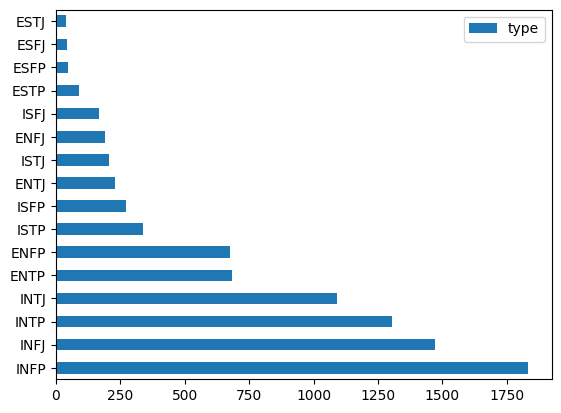

In [27]:
tmp_df.plot.barh()

# Display the contents of the posts by the first 10 persons in the dataset, each post truncated to 50 characters

In [28]:
def truncate_middle(s, n: int):
    """
    Truncate the middle part of a string to only display a fixed section at the front and
    at the end of the string.
    :param s: string to truncate
    :param n: the maximum length of the front and end section of the string to reveal
    :return: the truncated string
    """
    if len(s) <= n:
        # string is already short-enough
        return s
    # half of the size, minus the 3 .'s
    n_2 = int(n) / 2 - 3
    # whatever is left
    n_1 = n - n_2 - 3
    return '{0}...{1}'.format(s[:int(n_1)], s[-int(n_2):])

mbti_df.head(10)['posts'].apply(truncate_middle, args=(50,))


0    'http://www.youtube.com/w... new life for myse...
1    'I'm finding the lack of ... tell me I have is...
2    'Good one  _____   https:...m/watch?v=7ghqoYxm...
3    'Dear INTP,   I enjoyed o... they don't...|||L...
4    'You're fired.|||That's a...y are saying nothi...
5    '18/37 @.@|||Science  is ...iliar with that ty...
6    'No, I can't draw on my o... The one who looks...
7    'I tend to build up a col...friend of yours is...
8    I'm not sure, that's a go...om/watch?v=lK588zl...
9    'https://www.youtube.com/...devil incarnate. i...
Name: posts, dtype: object

- We note that the posts have a redundant leading and trailing `'` character.

## Remove the redundant leading and trailing `'` character
### Attempt removing the redundant leading and trailing `'` character, from the first 10 posts

In [29]:
mbti_df.head(10)['posts'].apply(str.strip, args=("'",))

0    http://www.youtube.com/watch?v=qsXHcwe3krw|||h...
1    I'm finding the lack of me in these posts very...
2    Good one  _____   https://www.youtube.com/watc...
3    Dear INTP,   I enjoyed our conversation the ot...
4    You're fired.|||That's another silly misconcep...
5    18/37 @.@|||Science  is not perfect. No scient...
6    No, I can't draw on my own nails (haha). Those...
7    I tend to build up a collection of things on m...
8    I'm not sure, that's a good question. The dist...
9    https://www.youtube.com/watch?v=w8-egj0y8Qs|||...
Name: posts, dtype: object

### Attempt removing the redundant leading and trailing `'` character, from all the posts

In [30]:
mbti_df['imp_posts'] = mbti_df['posts'].apply(str.strip, args=("'",))
mbti_df.head(10)

type                                              posts  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...   
1  ENTP  'I'm finding the lack of me in these posts ver...   
2  INTP  'Good one  _____   https://www.youtube.com/wat...   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...   
4  ENTJ  'You're fired.|||That's another silly misconce...   
5  INTJ  '18/37 @.@|||Science  is not perfect. No scien...   
6  INFJ  'No, I can't draw on my own nails (haha). Thos...   
7  INTJ  'I tend to build up a collection of things on ...   
8  INFJ  I'm not sure, that's a good question. The dist...   
9  INTP  'https://www.youtube.com/watch?v=w8-egj0y8Qs||...   

                                           imp_posts  
0  http://www.youtube.com/watch?v=qsXHcwe3krw|||h...  
1  I'm finding the lack of me in these posts very...  
2  Good one  _____   https://www.youtube.com/watc...  
3  Dear INTP,   I enjoyed our conversation the ot...  
4  You're fired.|||That's another silly misconcep...  
5  18/37 @.@|||Science  is not perfect. No scient...  
6  No, I can't draw on my own nails (haha). Those...  
7  I tend to build up a collection of things on m...  
8  I'm not sure, that's a good question. The dist...  
9  https://www.youtube.com/watch?v=w8-egj0y8Qs|||...

In [31]:
posts_ = 'imp_posts'
type_ = 'type'

# Text preprocessing



In [32]:
post1 = mbti_df.iloc[0][posts_]
post1

"http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...|

In [33]:
def process_post(post_text: str):
    out = post_text.split("|||")
    return " ".join(out)
    pass

process_post(post1)


"http://www.youtube.com/watch?v=qsXHcwe3krw http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks What has been the most life-changing experience in your life? http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today. May the PerC Experience immerse you. The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206 Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as... 84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ... Welcome and stuf

In [34]:
import nltk
# nltk.download_gui()

In [35]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [36]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [37]:

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [38]:
from nltk import word_tokenize
import string
punctuations = string.punctuation

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def text_preprocessing(post_str: str, vocab=None):
    # Lowercase
    post_str = post_str.lower()

    # Removing Punctuation
    post_str = "".join([char for char in post_str if char not in punctuations])

    # Tokenization
    words: list = word_tokenize(post_str)

    # Stopword Filtering
    filtered_words = [word for word in words if word not in stop_words]

    # Remove words not in the vocabulary
    if vocab is not None:
        filtered_words = [word for word in filtered_words if word in vocab]
        pass

    # Lemmatization
    lem_words = [wordnet_lemmatizer.lemmatize(word) for word in filtered_words]
    return lem_words

    pass

# Test the function on some random sentence.
text_preprocessing("It is a truth universally acknowledged, that a single man in possession of a good fortune, must be in want of a wife.")


['truth',
 'universally',
 'acknowledged',
 'single',
 'man',
 'possession',
 'good',
 'fortune',
 'must',
 'want',
 'wife']

In [39]:
# wdf = mbti_df.head(10)
wdf = mbti_df.copy()
wdf.head(10)

type                                              posts  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...   
1  ENTP  'I'm finding the lack of me in these posts ver...   
2  INTP  'Good one  _____   https://www.youtube.com/wat...   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...   
4  ENTJ  'You're fired.|||That's another silly misconce...   
5  INTJ  '18/37 @.@|||Science  is not perfect. No scien...   
6  INFJ  'No, I can't draw on my own nails (haha). Thos...   
7  INTJ  'I tend to build up a collection of things on ...   
8  INFJ  I'm not sure, that's a good question. The dist...   
9  INTP  'https://www.youtube.com/watch?v=w8-egj0y8Qs||...   

                                           imp_posts  
0  http://www.youtube.com/watch?v=qsXHcwe3krw|||h...  
1  I'm finding the lack of me in these posts very...  
2  Good one  _____   https://www.youtube.com/watc...  
3  Dear INTP,   I enjoyed our conversation the ot...  
4  You're fired.|||That's another silly misconcep...  
5  18/37 @.@|||Science  is not perfect. No scient...  
6  No, I can't draw on my own nails (haha). Those...  
7  I tend to build up a collection of things on m...  
8  I'm not sure, that's a good question. The dist...  
9  https://www.youtube.com/watch?v=w8-egj0y8Qs|||...

In [40]:
from joblib import Parallel, delayed
from math import sqrt


In [41]:
from joblib import Parallel, delayed
processed_posts = Parallel(n_jobs=-2, backend='threading')(delayed(text_preprocessing)(post) for post in wdf['imp_posts'])
processed_posts = [" ".join(post) for post in processed_posts]
processed_posts


['httpwwwyoutubecomwatchvqsxhcwe3krwhttp41mediatumblrcomtumblrlfouy03pma1qa1rooo1500jpgenfp intj moment httpswwwyoutubecomwatchviz7le1g4xm4 sportscenter top ten play httpswwwyoutubecomwatchvucdfze1etec prankswhat lifechanging experience lifehttpwwwyoutubecomwatchvvxzeywwrdw8 httpwwwyoutubecomwatchvu8ejam5dp3e repeat todaymay perc experience immerse youthe last thing infj friend posted facebook committing suicide next day rest peace httpvimeocom22842206hello enfj7 sorry hear distress natural relationship perfection time every moment existence try figure hard time time growth as84389 84390 httpwallpaperpassioncomupload23700friendshipboyandgirlwallpaperjpg httpassetsdornobcomwpcontentuploads201004roundhomedesignjpg welcome stuffhttpplayeressencecomwpcontentuploads201308redredthepokemonmaster32560474450338jpg game set matchprozac wellbrutin least thirty minute moving leg dont mean moving sitting desk chair weed moderation maybe try edible healthier alternativebasically come three item youv

In [42]:
posts_df = pd.DataFrame(processed_posts, columns=['posts'])
posts_df

posts
0     httpwwwyoutubecomwatchvqsxhcwe3krwhttp41mediat...
1     im finding lack post alarmingsex boring positi...
2     good one httpswwwyoutubecomwatchvfhigbolffgwof...
3     dear intp enjoyed conversation day esoteric ga...
4     youre firedthats another silly misconception a...
...                                                 ...
8670  httpswwwyoutubecomwatchvt8edhbh908ixfp always ...
8671  soif thread already exists someplace else http...
8672  many question thing would take purple pill pic...
8673  conflicted right come wanting child honestly m...
8674  long since personalitycafe although doesnt see...

[8675 rows x 1 columns]

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(posts_df['posts'])
X


<8675x341195 sparse matrix of type '<class 'numpy.float64'>'
	with 3769988 stored elements in Compressed Sparse Row format>

In [44]:
import joblib

vocab_file = 'vectorizer_vocab.model'
joblib.dump(vectorizer.vocabulary_, vocab_file)


['vectorizer_vocab.model']

In [45]:
X.shape

(8675, 341195)

In [46]:
vectorizer.get_feature_names_out()

array(['00', '000', '0000', ..., 'ﾉﾟ', 'ﾟﾉ', 'ﾟﾟ'], dtype=object)

In [47]:
y = wdf['type']
y

0       INFJ
1       ENTP
2       INTP
3       INTJ
4       ENTJ
        ... 
8670    ISFP
8671    ENFP
8672    INTP
8673    INFP
8674    INFP
Name: type, Length: 8675, dtype: object

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [49]:
from sklearn.metrics import f1_score
classifier_scores = {}

mbti_types = mbti_df['type'].unique()

def compute_f1_score(y_true_, y_pred_):
    y_t = pd.DataFrame(y_true_).replace(mbti_types, list(range(len(mbti_types))))
    y_p = pd.DataFrame(y_pred_).replace(mbti_types, list(range(len(mbti_types))))
    return f1_score(y_t, y_p, average='micro')
    pass



# Train and Test the Classification models
## 1. Naïve Bayes

In [50]:
from sklearn.naive_bayes import ComplementNB
nbc = ComplementNB()
nbc.fit(X_train, y_train)


ComplementNB()

In [51]:
y_pred = nbc.predict(X_test)
y_pred[0:10]


array(['INFP', 'INFP', 'INFP', 'INFP', 'INFP', 'INFP', 'INFP', 'INFP',
       'INFP', 'INFP'], dtype='<U4')

In [52]:
classifier_scores['Naive Bayes'] = compute_f1_score(y_test, y_pred)


## 2. K-Nearest Neighbors

In [53]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5, n_jobs=3)
neigh.fit(X_train, y_train)


KNeighborsClassifier(n_jobs=3)

In [54]:
y_pred = neigh.predict(X_test)
y_pred[0:10]

array(['INFJ', 'ENFP', 'INTP', 'INFJ', 'INTJ', 'INFJ', 'ENFJ', 'INFP',
       'ENFP', 'INTJ'], dtype=object)

In [55]:
classifier_scores['K-Nearest Neighbors'] = compute_f1_score(y_test, y_pred)


## 3. Gradient Boosting

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
import os
from typing import Optional

gbc_model_dump_file = 'gbc2.model'
gbc: Optional[GradientBoostingClassifier] = None
if os.path.exists(gbc_model_dump_file):
    gbc = joblib.load(gbc_model_dump_file)
    pass
else:
    gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0,
                                     max_depth=1, random_state=42)
    gbc.fit(X_train, y_train)
    pass



In [57]:
if not os.path.exists(gbc_model_dump_file):
    joblib.dump(gbc, gbc_model_dump_file)
    pass


In [58]:
# gbc_loaded = joblib.load('gbc.model')

In [59]:
y_pred = gbc.predict(X_test)
y_pred[0:10]


array(['INTP', 'INFJ', 'INTP', 'ENFP', 'INTP', 'INFJ', 'INFP', 'INTP',
       'INFP', 'INTP'], dtype=object)

In [60]:
classifier_scores['Gradient Boosting'] = compute_f1_score(y_test, y_pred)


# Comparison of the Accuracy Scores of the Classifiers

<Axes: xlabel='Classifier'>

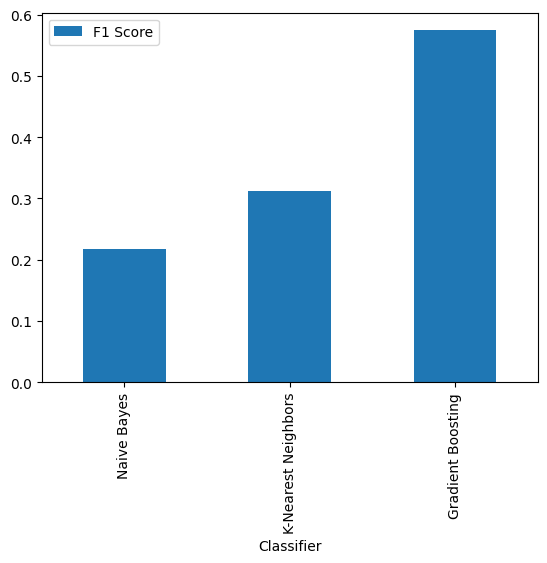

In [61]:
pd.DataFrame.from_dict(classifier_scores, orient='index', columns=['F1 Score']).plot.bar(xlabel='Classifier')

The Gradient Boosting classifier, has the best accuracy score when predicting the MBTI personality type of the test data, but is also the slowest in training the model.

In [62]:
!pip install aspose-words

# Use Case
For this use case, the system provides an interface to enable candidates assess themselves, based on their personality traits as predicted from their Resume, for their suitability in consideration for a given job.

## 1. Upload candidate's Resume
Specify path to the candidates Resume in PDF or MS Doc format

In [63]:
# This is a sample Resume for a Healthcare professional
candidate_resume = "/content/resume.pdf"

## 2. Text format extraction

In [64]:
!pip install pymupdf


In [65]:
import fitz  # PyMuPDF
import os

# Output plain text file path
output_file = "resume_out.txt"

def extract_text_from_pdf(pdf_path):
    text = ""
    doc = fitz.open(pdf_path)
    for page_num in range(doc.page_count):
        page = doc[page_num]
        text += page.get_text()
    return text

try:
    # Extract text from the PDF
    text_content = extract_text_from_pdf(candidate_resume)

    # Save the plain text content to a new file
    with open(output_file, "w", encoding="utf-8") as text_file:
        text_file.write(text_content)

except Exception as e:
    print(f"Error: {e}")


## 3. Provide job descriptions
Here we provide the job descriptions of all the jobs the candidate does wish to apply for.

In [66]:

def predict_personalities(text_list, trained_model):
    vocab = joblib.load(vocab_file)

    processed_text = Parallel(n_jobs=-2, backend='threading')(delayed(text_preprocessing)(post, vocab) for post in text_list)
    processed_text = [" ".join(post) for post in processed_text]

    vectorizer_ = TfidfVectorizer(vocabulary=vocab)
    X_ = vectorizer_.fit_transform(processed_text)

    return trained_model.predict(X_)
    pass



## 4. Jobs’ required personality traits
Predict the Personality traits required by the jobs based on the job descriptions

In [67]:
job_descriptions_file = "/content/job_descriptions.csv"

In [68]:
import pandas as pd
job_descriptions = pd.read_csv(job_descriptions_file).head(100)
job_descriptions

job_title  \
0                                 Dialysis Technician   
1                    Stage/alternance - Juriste (H/F)   
2   Specialty Pharmaceutical Sales Rep/Clinical Sp...   
3   NLP Research Scientist II/Senior NLP Research ...   
4       Machine Learning Software Engineering Manager   
..                                                ...   
95                         Office Manager - Charlotte   
96                       Proposal & Contracts Manager   
97                                      Music Teacher   
98  Instandhalter Zerspanungsmechanik - Bohrwerke ...   
99       Software Tester/Applications Analyst (SWA I)   

                      category  \
0   healthcare technology jobs   
1        emploi juridique.aspx   
2                   sales jobs   
3               higher ed jobs   
4                computer jobs   
..                         ...   
95         administrative jobs   
96             management jobs   
97          entertainment jobs   
98    industrie und produktion   
99               computer jobs   

                                      job_description  
0   The Dialysis Technician functions under the di...  
1   Stage ou Alternance - Juriste  \nA pourvoir dè...  
2   TITLE:  Specialty Pharmaceutical Sales Rep/Cli...  
3   Overview \nACT is a nonprofit organization hel...  
4   Seattle, Washington\n\nSkills :  Machine Learn...  
..                                                ...  
95  We are a growing and fast paced company that h...  
96  Proposal &amp; Contracts Manager - Georgetown,...  
97  Music Teacher  \n \n LOCATION:  MLK Elementary...  
98  Instandhalter Zerspanungsmechanik - Bohrwerke ...  
99  Software Tester/Applications Analyst (SWA I) \...  

[100 rows x 3 columns]

In [69]:
job_descriptions['mbti_type'] = predict_personalities(job_descriptions['job_description'], gbc)
job_descriptions

job_title  \
0                                 Dialysis Technician   
1                    Stage/alternance - Juriste (H/F)   
2   Specialty Pharmaceutical Sales Rep/Clinical Sp...   
3   NLP Research Scientist II/Senior NLP Research ...   
4       Machine Learning Software Engineering Manager   
..                                                ...   
95                         Office Manager - Charlotte   
96                       Proposal & Contracts Manager   
97                                      Music Teacher   
98  Instandhalter Zerspanungsmechanik - Bohrwerke ...   
99       Software Tester/Applications Analyst (SWA I)   

                      category  \
0   healthcare technology jobs   
1        emploi juridique.aspx   
2                   sales jobs   
3               higher ed jobs   
4                computer jobs   
..                         ...   
95         administrative jobs   
96             management jobs   
97          entertainment jobs   
98    industrie und produktion   
99               computer jobs   

                                      job_description mbti_type  
0   The Dialysis Technician functions under the di...      INTJ  
1   Stage ou Alternance - Juriste  \nA pourvoir dè...      INFJ  
2   TITLE:  Specialty Pharmaceutical Sales Rep/Cli...      INTJ  
3   Overview \nACT is a nonprofit organization hel...      INFJ  
4   Seattle, Washington\n\nSkills :  Machine Learn...      INFJ  
..                                                ...       ...  
95  We are a growing and fast paced company that h...      INTJ  
96  Proposal &amp; Contracts Manager - Georgetown,...      INFP  
97  Music Teacher  \n \n LOCATION:  MLK Elementary...      INFJ  
98  Instandhalter Zerspanungsmechanik - Bohrwerke ...      INFJ  
99  Software Tester/Applications Analyst (SWA I) \...      INFJ  

[100 rows x 4 columns]

## 5. Candidate’s Personality Prediction

In [70]:
import fitz  # PyMuPDF

def extract_text_from_pdf(pdf_path):
    text = ""
    doc = fitz.open(pdf_path)
    for page_num in range(doc.page_count):
        page = doc[page_num]
        text += page.get_text()
    return text


# Extract text from the PDF
pdf_text = extract_text_from_pdf(candidate_resume)
pdf_text
# # Now you can use pdf_text for further processing
candidates_personality = predict_personalities([pdf_text], gbc)
candidates_personality


array(['INFJ'], dtype=object)

In [71]:
# import chardet

# with open(candidate_resume, 'rb') as f:
#     result = chardet.detect(f.read())

# encoding = result['encoding']

# with open(candidate_resume, encoding=encoding) as f:
#     resume_txt = " ".join(f.readlines())
#     candidates_personality = predict_personalities([resume_txt], gbc)
#     pass

# candidates_personality


In [72]:
candidates_personality[0]

'INFJ'

## 6. Job prediction
Determine the jobs the candidate is best qualified for based on the personality traits recorded in their Resume

In [73]:
BM = job_descriptions['mbti_type'] == candidates_personality[0]
job_descriptions[BM]

job_title  \
1                    Stage/alternance - Juriste (H/F)   
3   NLP Research Scientist II/Senior NLP Research ...   
4       Machine Learning Software Engineering Manager   
5                                           Counselor   
6                         Associate Corporate Counsel   
..                                                ...   
91  Cleveland Electrical and Computer Engineering ...   
94                        RRT / RESPIRATORY THERAPIST   
97                                      Music Teacher   
98  Instandhalter Zerspanungsmechanik - Bohrwerke ...   
99       Software Tester/Applications Analyst (SWA I)   

                    category  \
1      emploi juridique.aspx   
3             higher ed jobs   
4              computer jobs   
5        social service jobs   
6                 legal jobs   
..                       ...   
91             computer jobs   
94           healthcare jobs   
97        entertainment jobs   
98  industrie und produktion   
99             computer jobs   

                                      job_description mbti_type  
1   Stage ou Alternance - Juriste  \nA pourvoir dè...      INFJ  
3   Overview \nACT is a nonprofit organization hel...      INFJ  
4   Seattle, Washington\n\nSkills :  Machine Learn...      INFJ  
5   Overview \n Behavioral Health Group  (BHG), a ...      INFJ  
6   The Associate Corporate Counsel will serve as ...      INFJ  
..                                                ...       ...  
91  Cleveland Electrical and Computer Engineering ...      INFJ  
94  This teaching hospital located in Oregon has b...      INFJ  
97  Music Teacher  \n \n LOCATION:  MLK Elementary...      INFJ  
98  Instandhalter Zerspanungsmechanik - Bohrwerke ...      INFJ  
99  Software Tester/Applications Analyst (SWA I) \...      INFJ  

[72 rows x 4 columns]